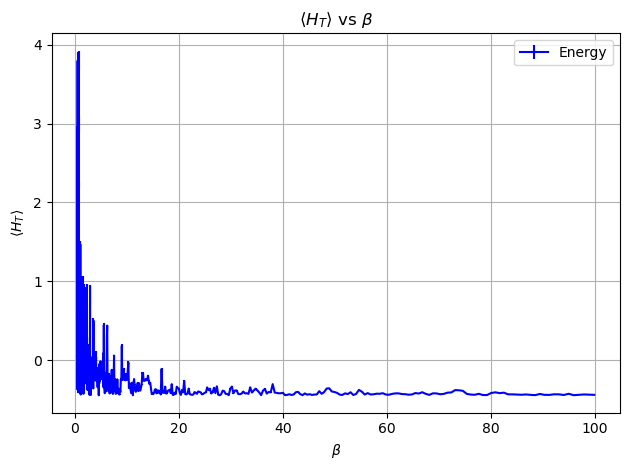

In [25]:
import numpy as np
import matplotlib.pyplot as plt

T, en, err_en = np.loadtxt("08.2/parameters.dat", usecols=(0, 3, 4), skiprows=1, unpack=True)

plt.errorbar(1/T, en, yerr=err_en, label='Energy', color='blue')

plt.xlabel(r"$\beta$")
plt.ylabel(r"$\langle H_T \rangle$")
plt.title(r"$\langle H_T \rangle$ vs $\beta$")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

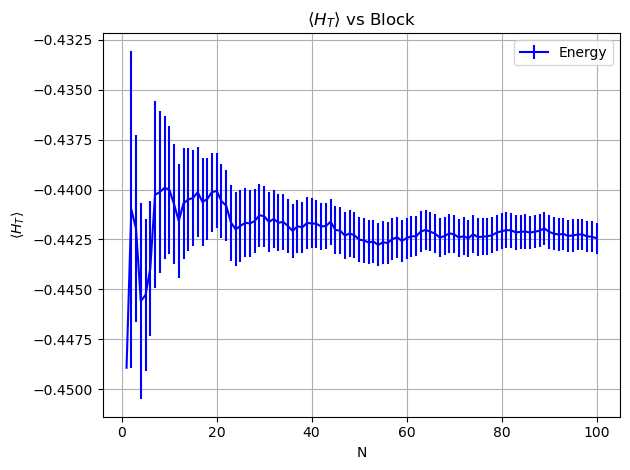

In [23]:
N, en_block, err_en_block = np.loadtxt("08.1/energy.dat", usecols=(0, 2, 3), skiprows=1, unpack=True)

plt.errorbar(N, en_block, yerr=err_en_block, label='Energy', color='blue')

plt.xlabel("N")
plt.ylabel(r"$\langle H_T \rangle$")
plt.title(r"$\langle H_T \rangle$ vs Block")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

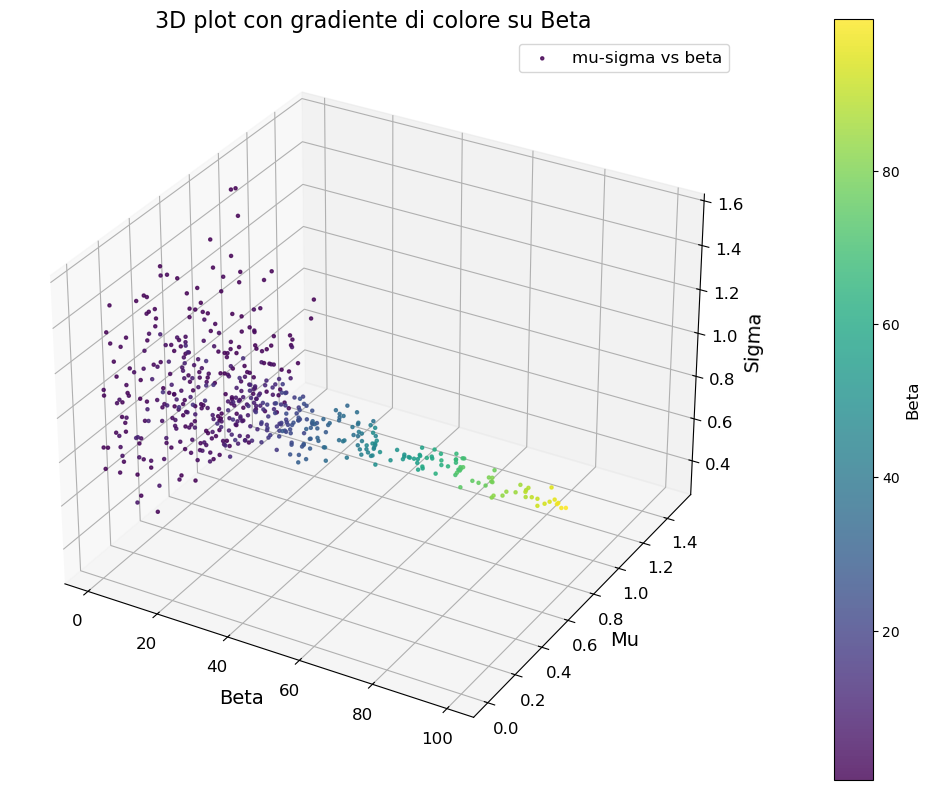

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mu, sigma = np.loadtxt("08.2/parameters.dat", unpack=True, usecols=(1,2), skiprows=1)
beta = 1/T

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter 3D con gradiente di colore in base a beta
sc = ax.scatter(beta, mu, sigma,
                c=beta,              # colore in base a beta
                cmap='viridis',      # colormap (puoi provare anche 'plasma', 'inferno', ecc.)
                marker='.',          # marker leggero
                s=20,                # dimensione marker
                alpha=0.8,           # opacità
                label='mu-sigma vs beta')

# Etichette
ax.set_xlabel('Beta', fontsize=14)
ax.set_ylabel('Mu', fontsize=14)
ax.set_zlabel('Sigma', fontsize=14)
ax.set_title('3D plot con gradiente di colore su Beta', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=12)

# Barra del colore
cbar = fig.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Beta', fontsize=12)

# Legenda
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

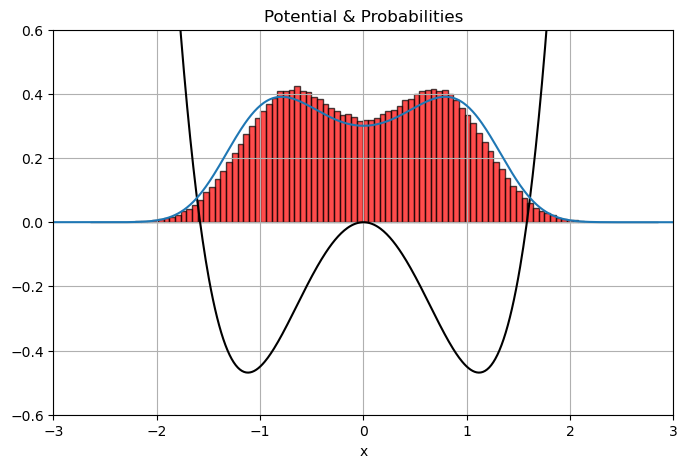

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x_hist = np.loadtxt("08.1/amplitude.dat", unpack=True, usecols=(0))

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

plt.figure(figsize=(8,5))
scale = 0.3
plt.hist(x_hist, bins=100, color='r', edgecolor='black', alpha=0.7, density=True)
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()